In [1]:
from numpy import loadtxt, zeros, ones, array, linspace, logspace
from pylab import scatter, show, title, xlabel, ylabel, plot, contour


#Evaluate the linear regression
def compute_cost(X, y, theta):
	'''
	Comput cost for linear regression
	'''
	#Number of training samples
	m = y.size
	predictions = X.dot(theta).flatten()
	sqErrors = (predictions - y) ** 2
	J = (1.0 / (2 * m)) * sqErrors.sum()
	return J

In [2]:
def gradient_descent(X, y, theta, alpha, num_iters):
	m = y.size
	J_history = zeros(shape=(num_iters, 1))
	for i in range(num_iters):
		predictions = X.dot(theta).flatten()
		errors_x1 = (predictions - y) * X[:, 0]
		errors_x2 = (predictions - y) * X[:, 1]
		theta[0][0] = theta[0][0] - alpha * (1.0 / m) * errors_x1.sum()
		theta[1][0] = theta[1][0] - alpha * (1.0 / m) * errors_x2.sum()
		J_history[i, 0] = compute_cost(X, y, theta)
	return theta, J_history



In [4]:
#Load the dataset

data = loadtxt('/home/vagrant/corso/data/ex1data1.txt', delimiter=',')


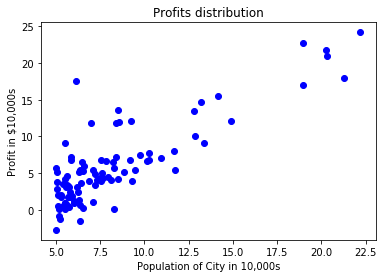

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
#Plot the data
plt.scatter(data[:, 0], data[:, 1], marker='o', c='b')
title('Profits distribution')
xlabel('Population of City in 10,000s')
ylabel('Profit in $10,000s')
plt.show()


In [6]:
X = data[:, 0]
y = data[:, 1]


#number of training samples
m = y.size

#Add a column of ones to X (interception data)
it = ones(shape=(m, 2))
it[:, 1] = X

#Initialize theta parameters
theta = zeros(shape=(2, 1))

#Some gradient descent settings
iterations = 1500
alpha = 0.01

#compute and display initial cost
print compute_cost(it, y, theta)

theta, J_history = gradient_descent(it, y, theta, alpha, iterations)

print theta # Y = theta0 + theta1*X
#Predict values for population sizes of 35,000 and 70,000
predict1 = array([1, 3.5]).dot(theta).flatten()
print 'For population = 35,000, we predict a profit of %f' % (predict1 * 10000)
predict2 = array([1, 7.0]).dot(theta).flatten()
print 'For population = 70,000, we predict a profit of %f' % (predict2 * 10000)

32.0727338775
[[-3.63029144]
 [ 1.16636235]]
For population = 35,000, we predict a profit of 4519.767868
For population = 70,000, we predict a profit of 45342.450129


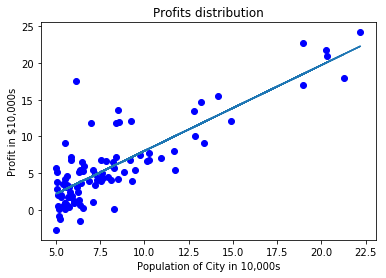

In [7]:
#Plot the results
result = it.dot(theta).flatten()

plt.scatter(data[:, 0], data[:, 1], marker='o', c='b')
title('Profits distribution')
xlabel('Population of City in 10,000s')
ylabel('Profit in $10,000s')

plt.plot(data[:, 0], result)
#


In [8]:
#Grid over which we will calculate J
theta0_vals = linspace(-10, 10, 100)
theta1_vals = linspace(-1, 4, 100)


#initialize J_vals to a matrix of 0's
J_vals = zeros(shape=(theta0_vals.size, theta1_vals.size))

#Fill out J_vals
for t1, element in enumerate(theta0_vals):
	for t2, element2 in enumerate(theta1_vals):
		thetaT = zeros(shape=(2, 1))
		thetaT[0][0] = element
		thetaT[1][0] = element2
		J_vals[t1, t2] = compute_cost(it, y, thetaT)

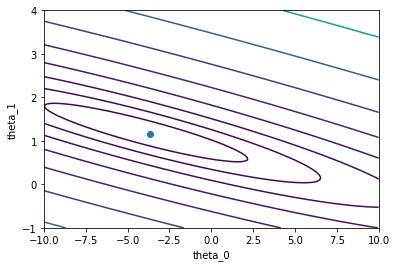

In [9]:
#Contour plot
J_vals = J_vals.T
#Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
contour(theta0_vals, theta1_vals, J_vals, logspace(-2, 3, 20))
xlabel('theta_0')
ylabel('theta_1')
scatter(theta[0][0], theta[1][0])
show()